In [1]:
# Check GPU
!nvidia-smi

Mon Jan 16 20:03:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.65       Driver Version: 527.56       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:13:00.0  On |                  N/A |
| 35%   31C    P8    23W / 175W |   1542MiB /  8192MiB |      9%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Torch - Torchvision - IceVision - IceData - MMDetection - YOLOv5 - EfficientDet Installation
!wget https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh

# Choose your installation target: cuda11 or cuda10 or cpu
# !bash icevision_install.sh cuda11 master

--2022-02-07 08:32:41--  https://raw.githubusercontent.com/airctic/icevision/master/icevision_install.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2691 (2.6K) [text/plain]
Saving to: ‘icevision_install.sh.1’

icevision_install.s 100%[===================>]   2.63K  --.-KB/s    in 0s      

2022-02-07 08:32:41 (65.5 MB/s) - ‘icevision_install.sh.1’ saved [2691/2691]



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# fiftyoneをソースからリインストール
REINSTALL = False
if REINSTALL:
  import shutil
  shutil.copy('/content/drive/MyDrive/Colab Notebooks/ice_vision/reinstall_51.sh',
              '/content/')
  !sh reinstall_51.sh

In [5]:
import fiftyone as fo

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# Imports

In [6]:
from icevision.all import *

Generating grammar tables from /usr/lib/python3.7/lib2to3/Grammar.txt
Generating grammar tables from /usr/lib/python3.7/lib2to3/PatternGrammar.txt
NumExpr defaulting to 8 threads.


INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:18


In [7]:
import numpy as np
from pathlib import Path

# Parse  pillar detectiondataset

In [8]:
# define the parameters and create the parser
annotation_filepath = '/content/drive/MyDrive/Colab Notebooks/ice_vision/train/result_annotation.json'
img_dir = '/content/drive/MyDrive/Colab Notebooks/ice_vision/train/images'

parser = parsers.COCOBBoxParser(annotations_filepath=annotation_filepath, img_dir=img_dir)

In [ ]:
# Parse annotations to create records
# recordsの内容をpickleで保存する場合, cache_filepath='save_path'
# reference -> https://github.com/airctic/icevision/blob/9c17564b82b2c17367ee2eb02fd24dbf8bf6376c/icevision/parsers/parser.py#L94
train_records, valid_records = parser.parse(cache_filepath='/content/drive/MyDrive/Colab Notebooks/ice_vision/train/records.pickle')
parser.class_map

In [10]:
train_records[3]

BaseRecord

common: 
	- Image size ImgSize(width=384, height=384)
	- Filepath: /content/drive/MyDrive/Colab Notebooks/ice_vision/train/images/16_51_4_2_40.png
	- Img: None
	- Record ID: 512
detection: 
	- BBoxes: [<BBox (xmin:250.4413417951041, ymin:331.88742625053465, xmax:268.6873133877303, ymax:350.56816588285614)>]
	- Is Crowds: [0]
	- Areas: [301.5300000000003]
	- Class Map: <ClassMap: {'background': 0, '1_rectangle': 1, '3_both': 2, '2_H_type': 3}>
	- Labels: [3]

# Create datasets with augumentations and transforms

In [11]:
# Transforms
# size is set to 384 because EfficientDet requires its inputs to be divisible by 128
image_size = 384
train_tfms = tfms.A.Adapter(
    [*tfms.A.aug_tfms(size=image_size, presize=384), tfms.A.Normalize()]) # presize: データ拡張サイズ
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

In [12]:
# Datasets
train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [13]:
# なぜかmatplotlibでエラーが出るのでversion指定してreinstall
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.2.1
Uninstalling matplotlib-3.2.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.2.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.2.1
     |████████████████████████████████| 13.1 MB 14.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yolov5-icevision 6.0

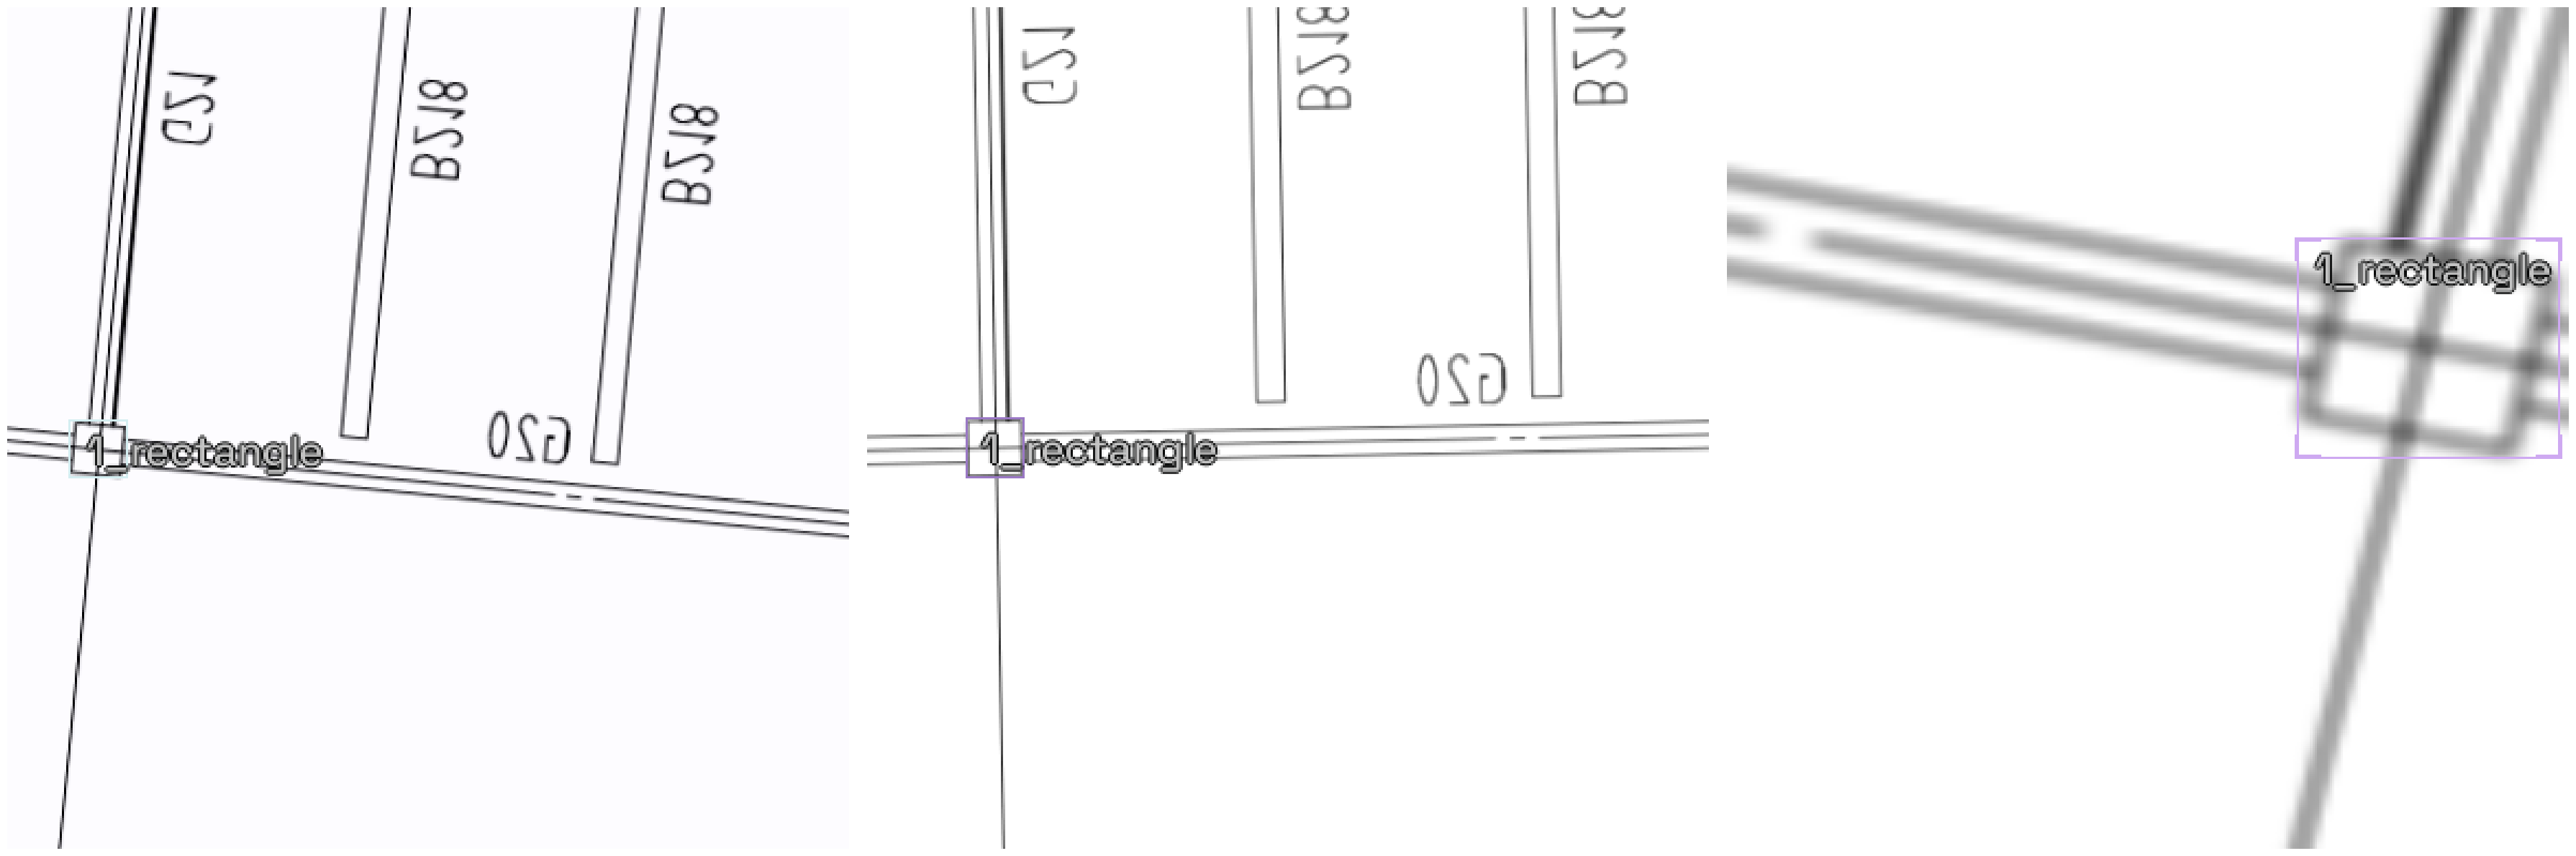

In [14]:
# Show an element of the train_ds with augmentation transformations applied
samples = [train_ds[0] for _ in range(3)]
show_samples(samples, ncols=3)

# Creating a model

## Select a library, model, and backbone

In order to create a model, we need to:
* Choose one of the **libraries** supported by IceVision
* Choose one of the **models** supported by the library
* Choose one of the **backbones** corresponding to a chosen model

You can access any supported models by following the IceVision unified API, use code completion to explore the available models for each library.



In [15]:
# Just change the value of selection to try another model

selection = 1

extra_args = {}

if selection == 0:
  model_type = models.mmdet.vfnet
  backbone = model_type.backbones.resnet50_fpn_mstrain_2x

elif selection == 1:
  model_type = models.mmdet.faster_rcnn
  backbone = model_type.backbones.resnet50_fpn_1x
  # extra_args['cfg_options'] = { 
  #   'model.bbox_head.loss_bbox.loss_weight': 2,
  #   'model.bbox_head.loss_cls.loss_weight': 0.8,
  #    }
  
elif selection == 2:
  # The Retinanet model is also implemented in the torchvision library
  model_type = models.torchvision.retinanet
  backbone = model_type.backbones.resnet50_fpn

elif selection == 3:
  model_type = models.ross.efficientdet
  backbone = model_type.backbones.tf_lite0
  # The efficientdet model requires an img_size parameter
  extra_args['img_size'] = image_size

elif selection == 4:
  model_type = models.ultralytics.yolov5
  backbone = model_type.backbones.small
  # The yolov5 model requires an img_size parameter
  extra_args['img_size'] = image_size

model_type, backbone, extra_args

(<module 'icevision.models.mmdet.models.faster_rcnn' from '/usr/local/lib/python3.7/dist-packages/icevision/models/mmdet/models/faster_rcnn/__init__.py'>,
 {})

In [16]:
backbone.__dict__

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'),
 'model_name': 'faster_rcnn',
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'}

In [17]:
parser.class_map

<ClassMap: {'background': 0, '1_rectangle': 1, '3_both': 2, '2_H_type': 3}>

In [ ]:
# Instantiate the model
model = model_type.model(backbone=backbone(pretrained=True), 
                         num_classes=len(parser.class_map), **extra_args)

## データローダ. 
データローダはmodel_typeに固有のものです。データローダの仕事は、データセットからアイテムを取得し、各モデルが必要とする特定のフォーマットでバッチ処理することです。このため、データローダーの作成はデータセットの作成とは別に行われます。  
  
valid_dlからアイテムの最初のバッチを見てみましょう。valid_tfmsはリサイズ(パディングあり)と正規化されたレコードのみを扱うので、例えば毎回異なる画像が返されるわけではないことを覚えておいてください。これは、トレーニング中に一貫した検証を行うために重要です。

In [19]:
# Data Loaders
train_dl = model_type.train_dl(train_ds, batch_size=8, num_workers=4, shuffle=True)
valid_dl = model_type.valid_dl(valid_ds, batch_size=8, num_workers=4, shuffle=False)

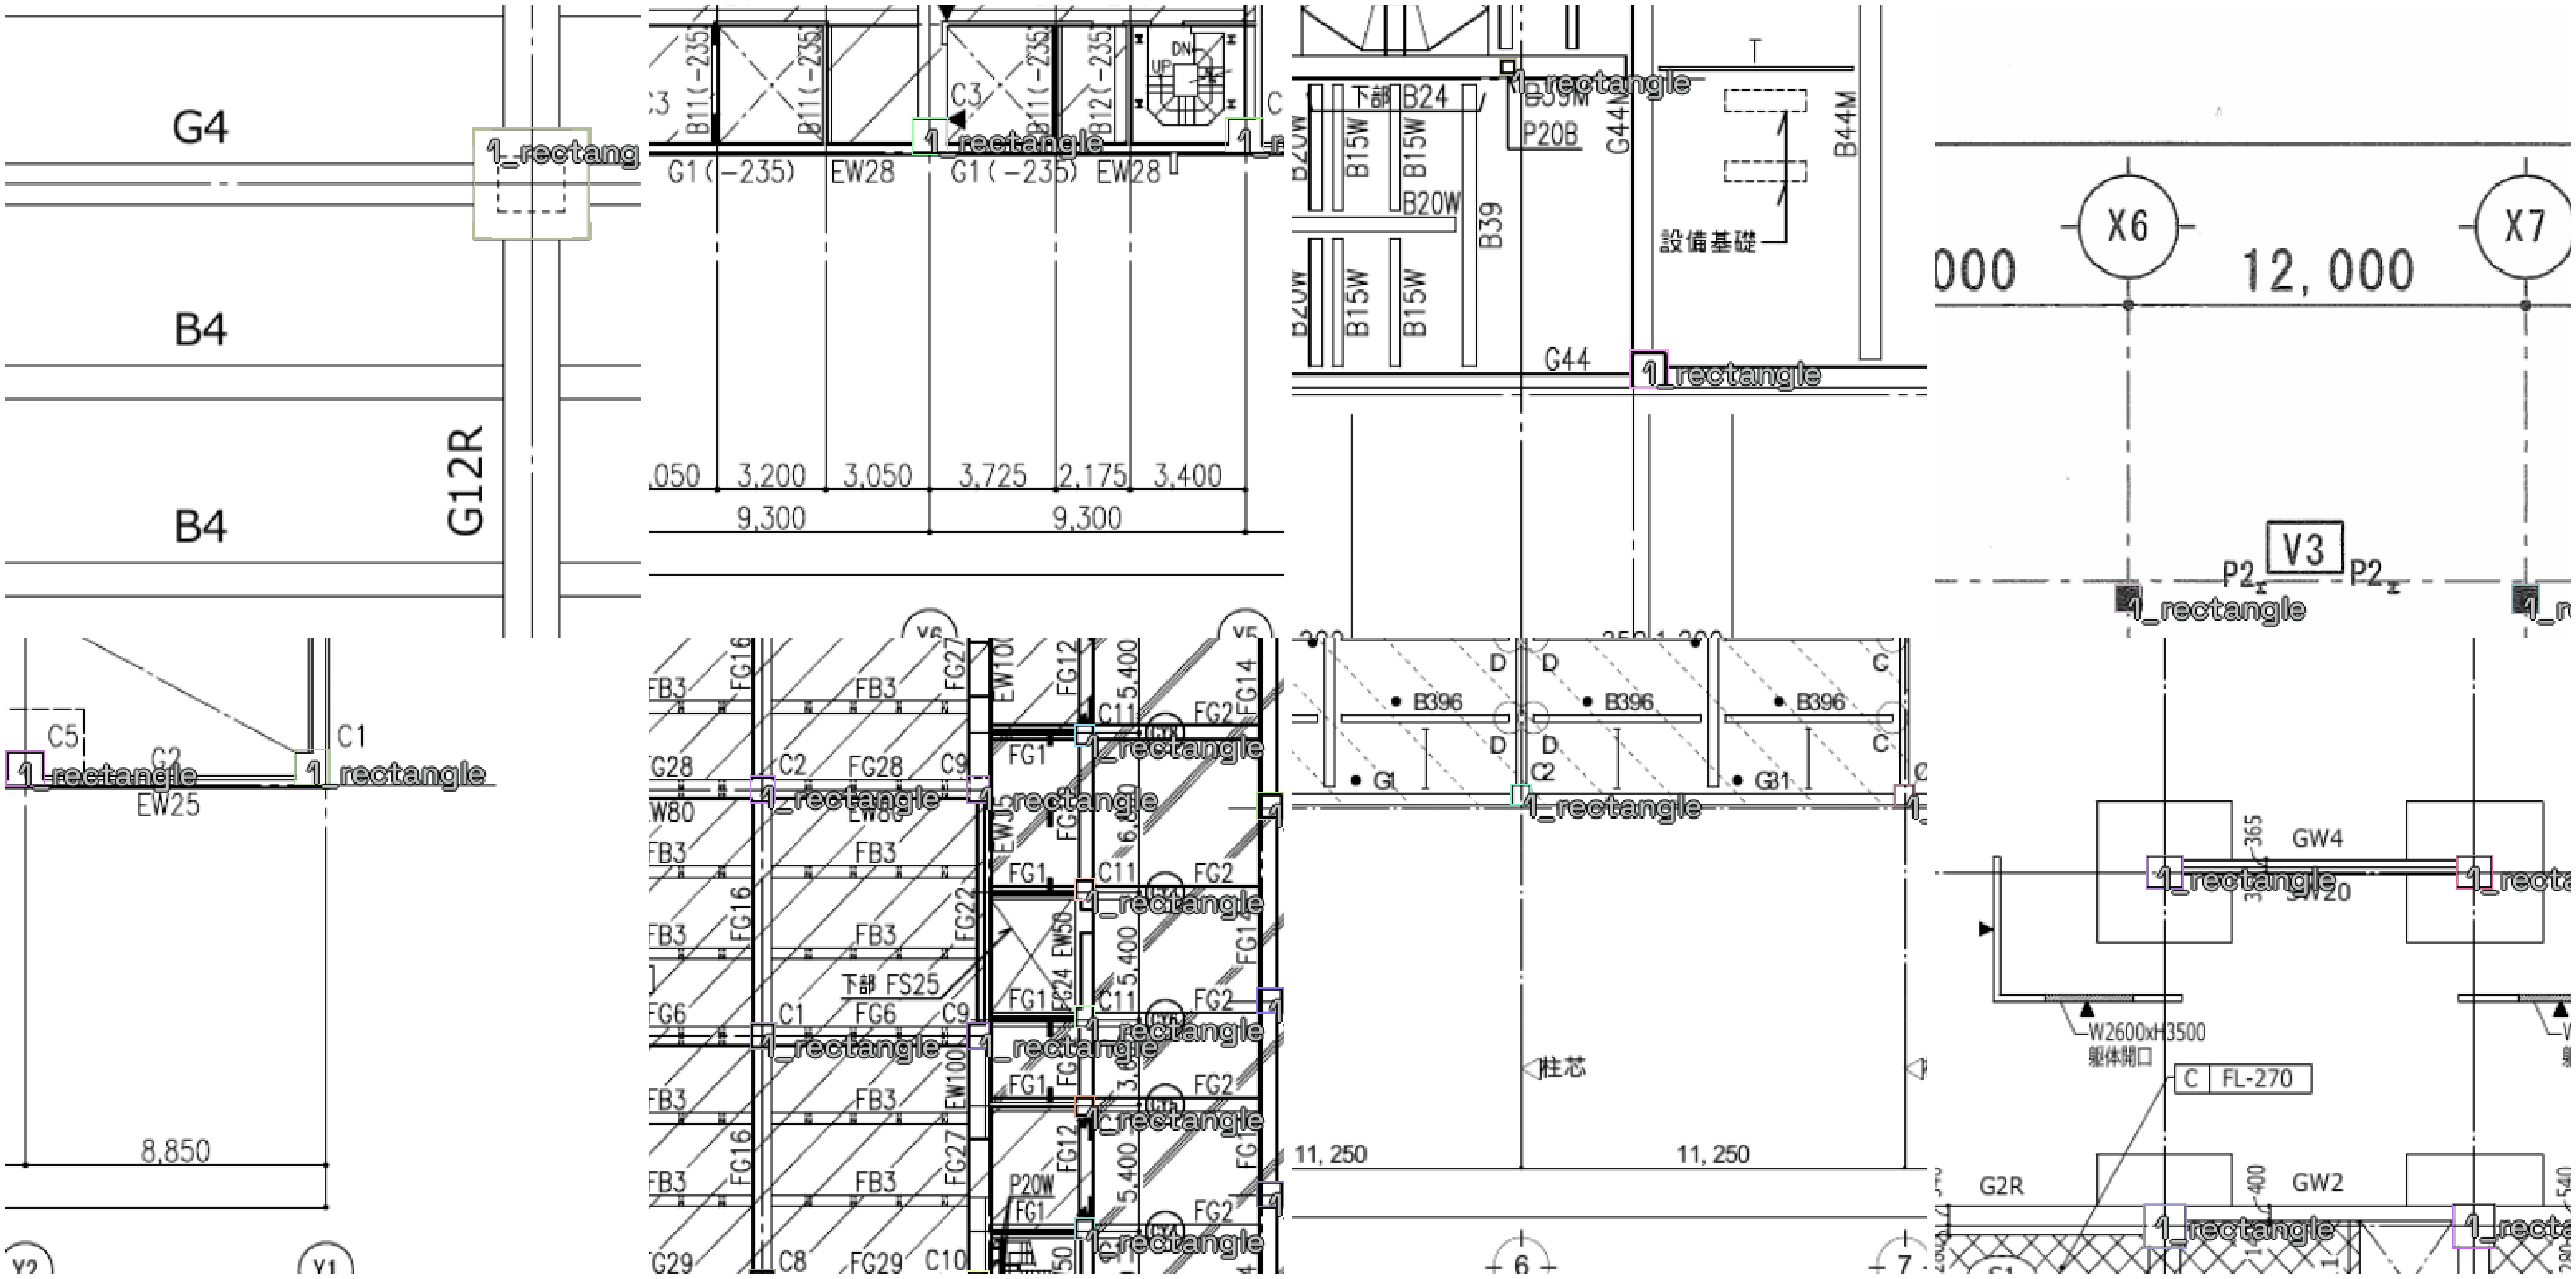

In [20]:
# show batch
model_type.show_batch(first(valid_dl), ncols=4)

## Metrics

In [21]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

## Training 

In [22]:
class LightModel(model_type.lightning.ModelAdapter):
    def configure_optimizers(self):
        return Adam(self.parameters(), lr=1e-4)
    
light_model = LightModel(model, metrics=metrics)

In [ ]:
trainer = pl.Trainer(max_epochs=5, gpus=1)
trainer.fit(light_model, train_dl, valid_dl)

Validation sanity check: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/data.py:60: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  "Trying to infer the `batch_size` from an ambiguous collection. The batch size we"


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/data.py:60: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  "Trying to infer the `batch_size` from an ambiguous collection. The batch size we"


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

## Using the model - inference and showing results

The first step in reviewing the model is to show results from the validation dataset. This is easy to do with the `show_results` function.

In [ ]:
model_type.show_results(model, valid_ds, detection_threshold=.5)